In [1]:
import numpy as np
from numpy import exp, loadtxt, pi, sqrt
from scipy import stats
from scipy.stats import binned_statistic 
from astropy.table import Table, Column, MaskedColumn
import math
import matplotlib.pyplot as plt
import pylab
from astropy.io import ascii
import pickle
import pandas as pd
import os.path
from numpy import exp, loadtxt, pi, sqrt

In [2]:
def am(val):
    return (val[1:]+val[:-1])/2

from scipy import interpolate
def confidence_intervals(z,dx=1,dy=1):
    """
    takes normalised probability distribution as input (fi dx,dy=1 then probdist=n/Ntotal)
    outputs the level of the contour at which 75% 50% and 25%
    """
    n = 20
    t = np.linspace(0, z.max(), n)
    integral = ((z >= t[:, None, None]) * z).sum(axis=(1,2)) *dx*dy
    f = interpolate.interp1d(integral, t)
    t_contours = f(np.array([0.95,0.68,0.40]))
    return np.append(t_contours,1)

In [4]:
nsim = 27
lista_columns = ['id','pid','Rvir','Spin','Rs_Klypin','M200b','ba','ca','ba500c','ca500c','Vpeak','TidalForce'] 


path = 'Data/Rockstar/SIMBA/CV/CV_'
for i in range(nsim):
    if i == 0:
        data_bar = pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', index_col=False, header=63, sep='\s+', names=lista_columns, 
                         usecols=(1,5,11,26,37,39,46,47,51,52,66,81), low_memory=False)
    if i > 0: 
        data_aux = pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', index_col=False, header=63, sep='\s+', names=lista_columns, 
                         usecols=(1,5,11,26,37,39,46,47,51,52,66,81), low_memory=False)
        data_bar = pd.concat([data_bar, data_aux])
  

cv = data_bar.Rvir / data_bar.Rs_Klypin
data_bar.insert(9,'cv', cv)
data_bar

,id,pid,Rvir,Spin,Rs_Klypin,M200b,ba,ca,ba500c,cv,ca500c,Vpeak,TidalForce
0,344295,-1,730.277,0.01869,111.33200,51029000000000,0.86191,0.51158,0.74518,6.559453,0.45613,630.28,0.00000
1,344378,-1,565.932,0.02785,47.93490,24498000000000,0.80008,0.67483,0.84359,11.806262,0.71986,515.00,0.00000
2,347541,-1,562.892,0.08199,114.39400,22997000000000,0.44262,0.26124,0.09118,4.920643,0.06965,442.50,0.20756
3,347827,-1,545.513,0.02663,56.77110,22565000000000,0.67059,0.56207,0.70153,9.608991,0.58225,564.34,0.24087
4,342746,-1,536.714,0.01490,85.30470,21288000000000,0.57642,0.52103,0.48243,6.291728,0.45503,478.56,0.01264
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6731,359785,359787,10.334,0.27163,0.37523,129760000,0.00000,0.00000,0.00000,27.540442,0.00000,11.61,16.88875
6732,361824,-1,10.334,0.18259,1.81607,389280000,0.00000,0.00000,0.00000,5.690309,0.00000,16.05,0.96127
6733,362378,-1,10.334,0.00000,1.70413,583930000,0.00000,0.00000,0.00000,6.064091,0.00000,8.70,0.23781
6734,362903,362906,10.334,0.00000,1.91220,129760000,0.00000,0.00000,0.00000,5.404246,0.00000,21.67,3.10620


In [6]:
path = 'Data/Rockstar/SIMBA_DM/CV/CV_'
for i in range(nsim):
    if i == 0:
        data_dm = pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', index_col=False, header=64, sep='\s+', names=lista_columns, 
                         usecols=(1,5,11,26,37,39,46,47,51,52,63,78), low_memory=False)
    if i > 0: 
        data_aux = pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', index_col=False, header=64, sep='\s+', names=lista_columns, 
                         usecols=(1,5,11,26,37,39,46,47,51,52,63,78), low_memory=False)
        data_dm = pd.concat([data_dm, data_aux])
  

cv = data_dm.Rvir / data_dm.Rs_Klypin
data_dm.insert(9,'cv', cv)
M200b_02dex_log = 10.**(np.log10(data_dm.M200b)-0.1)
data_dm.insert(6,'M200b02d', M200b_02dex_log)
data_dm

,id,pid,Rvir,Spin,Rs_Klypin,M200b,M200b02d,ba,ca,ba500c,cv,ca500c,Vpeak,TidalForce
0,305675,-1,753.539,0.01896,84.70250,54723000000000,4.346802e+13,0.69481,0.42100,0.63980,8.896302,0.40566,684.05,0.00000
1,306395,-1,604.806,0.02458,89.63340,28440000000000,2.259069e+13,0.60011,0.49157,0.53776,6.747552,0.47619,565.47,0.00000
2,309489,-1,599.171,0.10019,109.45500,27418000000000,2.177889e+13,0.67742,0.45648,0.55888,5.474131,0.51457,473.30,0.22073
3,309651,-1,574.011,0.02400,55.56900,25383000000000,2.016243e+13,0.55763,0.47808,0.52083,10.329698,0.43896,525.10,0.25714
4,303734,-1,568.145,0.04278,50.95240,22592000000000,1.794546e+13,0.52638,0.50137,0.49578,11.150505,0.47999,499.14,0.09632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7383,317446,-1,19.359,0.03980,0.92893,853010000,6.775699e+08,0.70426,0.31840,0.92305,20.840106,0.05390,42.94,1.05749
7384,317382,317511,17.409,0.02298,1.46860,620370000,4.927774e+08,0.03328,0.00016,0.88646,11.854147,0.06240,16.52,1.55128
7385,319256,-1,17.409,0.28103,1.21875,853010000,6.775699e+08,0.66933,0.08259,0.47274,14.284308,0.06581,16.25,1.37515
7386,315301,315455,16.651,0.34660,4.37046,542830000,4.311852e+08,0.85686,0.00205,0.00000,3.809896,0.00000,19.44,1.73289


In [7]:
from haloscope import ConditionalMultiVariateGaussian 

all halos= 166463
1e+10 1.551e+14
[10.0, 10.8, 11.6] [12.6, 14.190751779920184]
[10.         10.8        11.6        12.6        14.19075178]
0 Mass range: 1e+10 6.31e+10
# halos bar: 64365 # halos dm: 72045
(64365, 1)
(64365, 4)
here
acceptance rate is  86.8619034988305 %
(72045, 4)


/tmp/ipykernel_213/1495503848.py:150: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('Purples')
/tmp/ipykernel_213/1495503848.py:153: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('binary')
/tmp/ipykernel_213/1495503848.py:156: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('Oranges')
/tmp/ipykernel_213/1495503848.py:181: MatplotlibDeprecationWarning: The collections attribute was deprecate

1 Mass range: 6.31e+10 3.981e+11
# halos bar: 14638 # halos dm: 14848
(14638, 1)
(14638, 4)
here
acceptance rate is  84.79725870930896 %
(14848, 4)


/tmp/ipykernel_213/1495503848.py:150: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('Purples')
/tmp/ipykernel_213/1495503848.py:153: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('binary')
/tmp/ipykernel_213/1495503848.py:156: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('Oranges')
/tmp/ipykernel_213/1495503848.py:181: MatplotlibDeprecationWarning: The collections attribute was deprecate

2 Mass range: 3.981e+11 3.981e+12
# halos bar: 3640 # halos dm: 3250
(3640, 1)
(3640, 4)
here
acceptance rate is  86.4131879819197 %
(3250, 4)


/tmp/ipykernel_213/1495503848.py:150: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('Purples')
/tmp/ipykernel_213/1495503848.py:153: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('binary')
/tmp/ipykernel_213/1495503848.py:156: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('Oranges')
/tmp/ipykernel_213/1495503848.py:181: MatplotlibDeprecationWarning: The collections attribute was deprecate

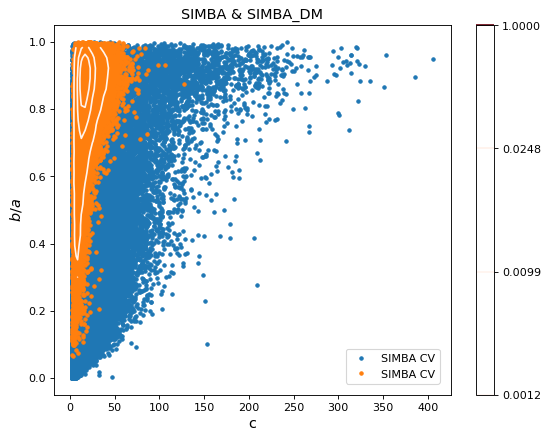

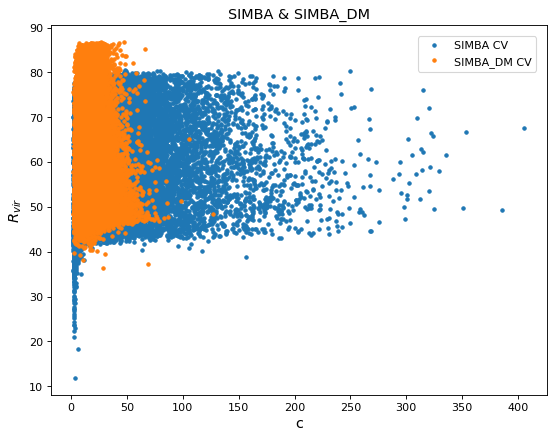

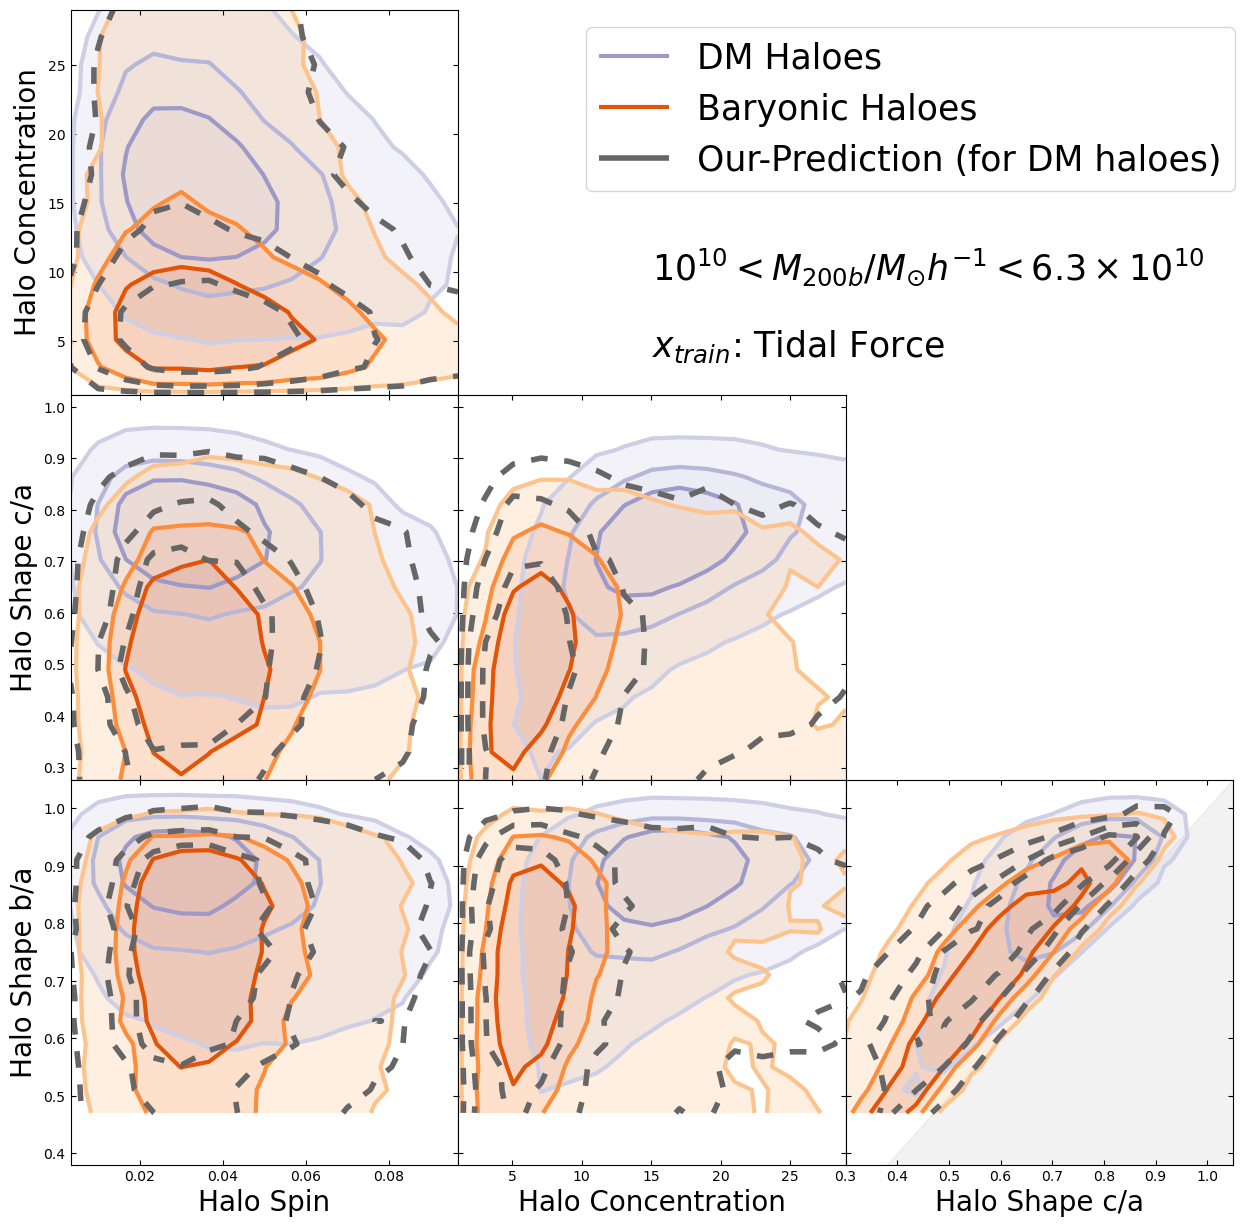

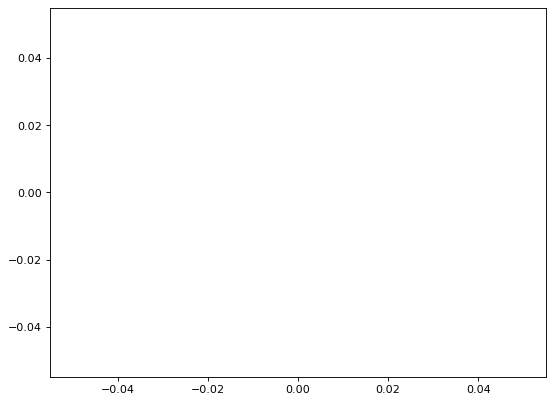

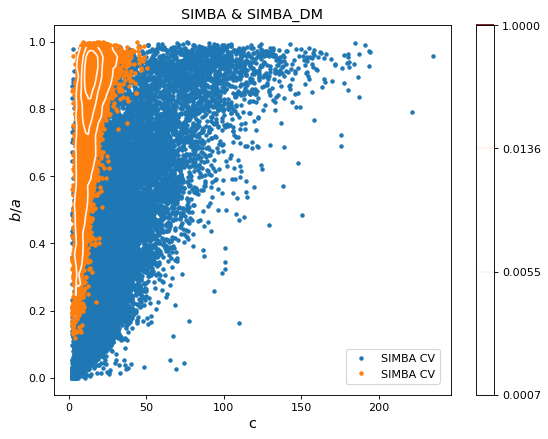

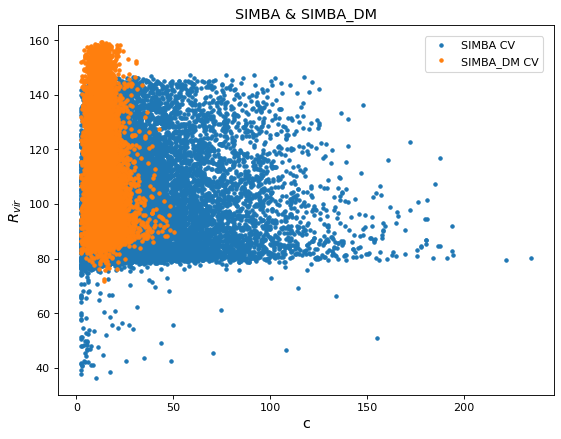

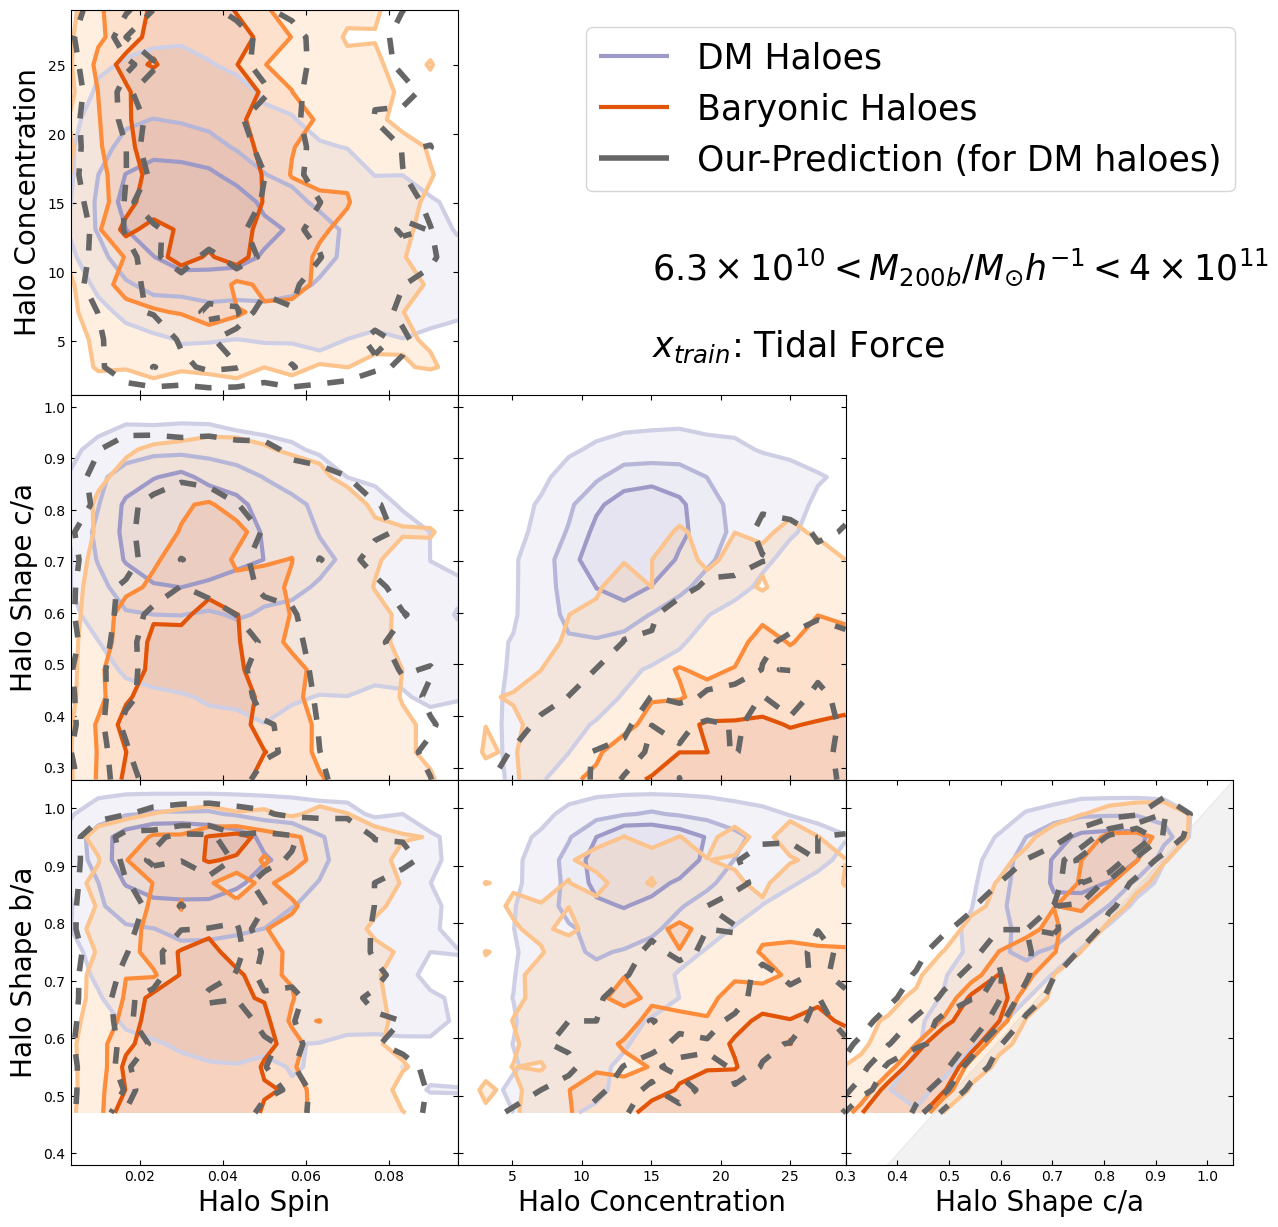

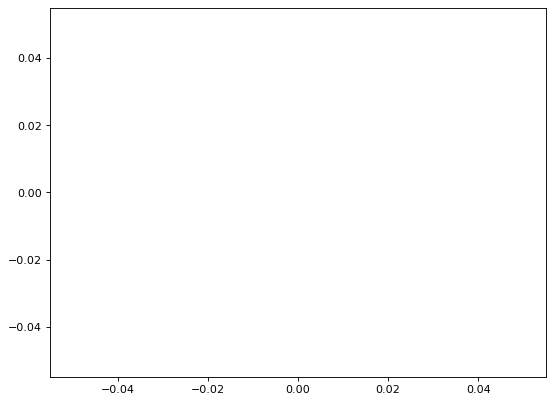

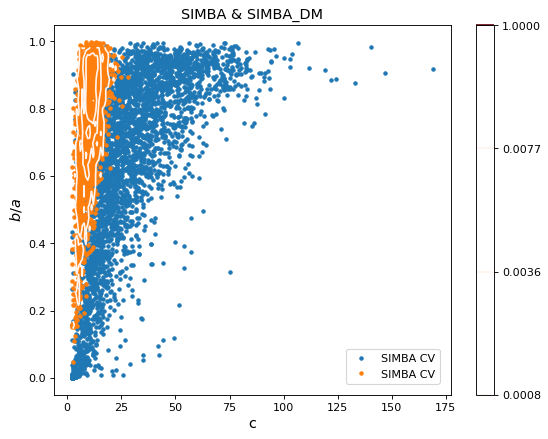

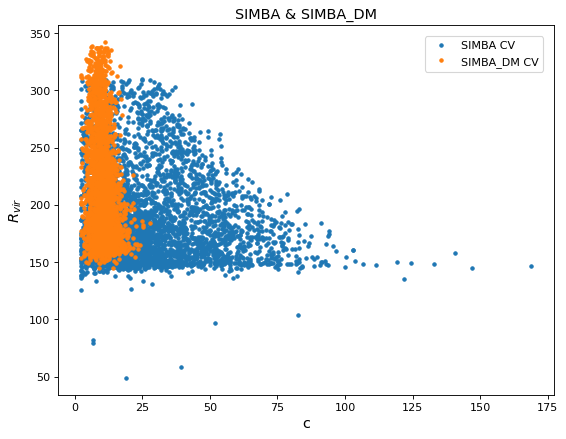

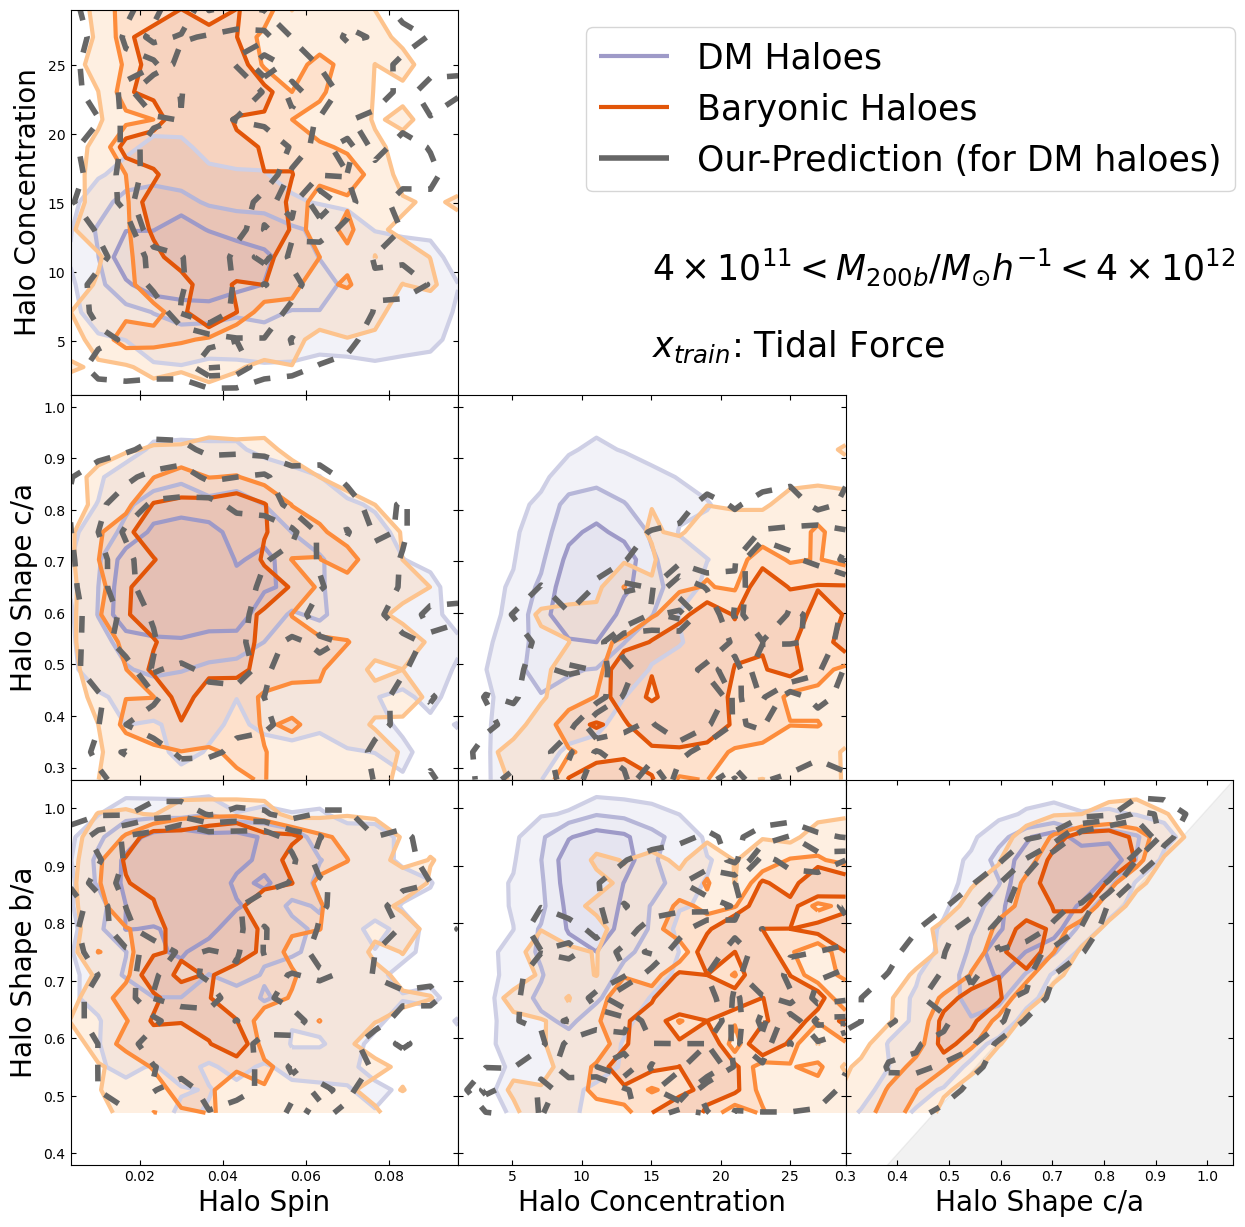

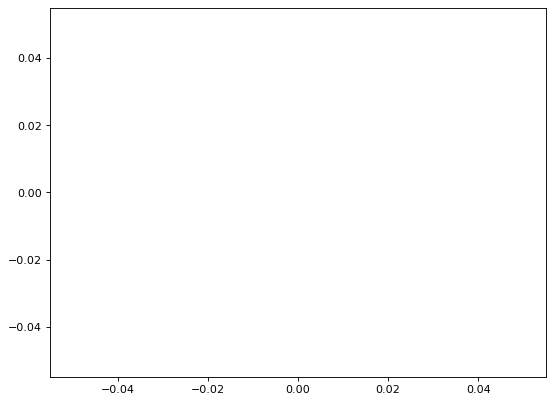

In [11]:
import array
halos_bar_all = data_bar[(data_bar.pid == -1)]
halos_dm_all = data_dm[(data_dm.pid == -1)]
print('all halos=',len(halos_bar_all))
#min_mass_hbar = halos_bar_all.M200b.min()
min_mass_hbar = 10**10
#max_mass_hbar = halos_bar_all.M200b.max()
max_mass_hbar = 10**11.6
mw_mass_i = np.log10(max_mass_hbar)
mw_mass_f = np.log10(10**12.6)
bin_4_i = mw_mass_f
bin_4_f = np.log10(halos_bar_all.M200b.max())
bin_4_f_10 = 10**bin_4_f
bin2_M_bar = [bin_4_i,bin_4_f]
print("%.4g"% min_mass_hbar,"%.4g"% bin_4_f_10)
nbins = 2
bins = np.arange(nbins)
del_logM_bar = np.asarray((np.log10(max_mass_hbar)-np.log10(min_mass_hbar))/nbins)
bins_M_bar = [np.log10(min_mass_hbar)]
name = []
for i in bins+1:
    bins_M_bar.append(np.log10(min_mass_hbar)+ i*del_logM_bar)
    name.append('halos_binM_bar'+'_'+str(i))
print(bins_M_bar,bin2_M_bar)
bins_M_bar = np.asarray(bins_M_bar+bin2_M_bar)
bins_M_bar_10 = np.asarray(10**bins_M_bar)
print(bins_M_bar)
font1 = {'color':  'red',
        'weight': 'normal',
        'size': 13,
        }
font2 = {'color':  'darkmagenta',
        'weight': 'normal',
        'size': 13,
        }
font3 = {'color':  'darkgreen',
        'weight': 'normal',
        'size': 13,
        }
font4 = {'color':  'black',
        'weight': 'normal',
        'size': 12.5,
        }
nbins = 3
bins = np.arange(nbins)
for i in bins:
    print(i,'Mass range:',"%.4g"% 10**bins_M_bar[i],"%.4g"% 10**bins_M_bar[i+1])
    halos_bar = halos_bar_all[(np.log10(halos_bar_all.M200b) >= bins_M_bar[i]) & (np.log10(halos_bar_all.M200b) < bins_M_bar[i+1])]               
    #halos_dm = halos_dm_all[(np.log10(halos_dm_all.M200b) >= bins_M_bar[i]) & (np.log10(halos_dm_all.M200b) < bins_M_bar[i+1])]               
    halos_dm = halos_dm_all[(np.log10(halos_dm_all.M200b02d) >= bins_M_bar[i]) & (np.log10(halos_dm_all.M200b02d) < bins_M_bar[i+1])]               
    print('# halos bar:',len(halos_bar),'# halos dm:',len(halos_dm))
    
    cg = ConditionalMultiVariateGaussian()
    x_train = np.asarray(halos_bar[['TidalForce']]) #np.random.randn(100000,2) ## this could be 100000 baryonified haloes with 2 input properties
    y_train = np.asarray(halos_bar[['cv','Spin','ca','ba']]) #np.random.randn(100000,3) ## this could be 100000 baryonified haloes with 3 output properties
    x_test  = np.asarray(halos_dm[['TidalForce']]) #np.random.randn(20000,2)   ## this could be 20000 dm haloes with 2 input properties


    print (x_train.shape)
    print (y_train.shape)
    cg.fit(x_train,y_train)
    y_pred = cg.predict(x_test)
    print(y_pred.shape)
    valy1,edge1,edge2 = np.histogram2d(halos_dm.cv, halos_dm.ba, bins=30, density = False)
    edgex = am(edge1)
    edgey = am(edge2)
    pylab.figure(num = None, figsize = (8, 6), dpi=80, facecolor = 'w', edgecolor = 'k')

    plt.plot(halos_bar.cv, halos_bar.ba,'.',label = "SIMBA CV")
    plt.plot(halos_dm.cv, halos_dm.ba,'.',label = "SIMBA CV")
    #plt.text(0.18,80, [bins_M_bar[i],bins_M_bar[i+1]], fontsize=11, fontdict=font2)
    #plt.text(0.18,80,["M200b".format(bins_M_bar[i],bins_M_bar[i+1])])

    #plt.contour(edgex, edgey, valy1.T / np.sum(valy1), levels = 5, cmap = 'Purples')
    #plt.colorbar()

    lvl = confidence_intervals(valy1.T/valy1.sum())
    plt.contour(edgex, edgey,valy1.T/valy1.sum(),levels=lvl,cmap='Reds')
    plt.colorbar()

    plt.title('SIMBA & SIMBA_DM', fontsize = 13)
    plt.legend(loc = 0, borderaxespad = 1.)
    plt.xlabel('c', fontsize=13)
    plt.ylabel(r'$b/a$', fontsize=13)
    #plt.xscale('log')
    #plt.yscale('log')
    #fig.savefig('fig1.png')
    pylab.figure(num = None, figsize = (8, 6), dpi=80, facecolor = 'w', edgecolor = 'k')

    plt.plot(halos_bar.cv, halos_bar.Rvir,'.',label = "SIMBA CV")
    plt.plot(halos_dm.cv, halos_dm.Rvir,'.',label = "SIMBA_DM CV")

    plt.title('SIMBA & SIMBA_DM', fontsize = 13)
    plt.legend(loc = 0, borderaxespad = 1.)
    plt.xlabel('c', fontsize=13)
    plt.ylabel(r'$R_{vir}$', fontsize=13)
    bins = 15
    ##spin vs conc
    ca_range   = [0.25, 1.05]
    conc_range = [0.1, 30]
    ba_range   = [0.45, 1.05]
    spin_range = [0, 0.1]
    rvir_range = [120, 200]
    density    = False
    valy1,edge1,edge2 = np.histogram2d(halos_bar.Spin, halos_bar.cv, bins=bins, range = [ spin_range,conc_range],density=density)
    valx1,edge1,edge2 = np.histogram2d(halos_dm.Spin, halos_dm.cv, bins=bins, range = [ spin_range,conc_range],density=density)
    valp1,edge1,edge2 = np.histogram2d(y_pred[:,1], y_pred[:,0], bins=bins, range = [ spin_range,conc_range],density=density)
    edgex = am(edge1)
    edgey = am(edge2)
    #%print (edgey)

    ## vs c/a
    _2valy1,edge1,edge2 = np.histogram2d(halos_bar.Spin, halos_bar.ca, bins=bins, range = [ spin_range,ca_range],density=density)
    _2valx1,edge1,edge2 = np.histogram2d(halos_dm.Spin, halos_dm.ca, bins=bins, range = [ spin_range,ca_range],density=density)
    _2valp1,edge1,edge2 = np.histogram2d(y_pred[:,1], y_pred[:,2], bins=bins, range = [ spin_range,ca_range],density=density)
    _2edgex = am(edge1)
    _2edgey = am(edge2)
    #%


    _3valy1,edge1,edge2 = np.histogram2d(halos_bar.Spin, halos_bar.ba, bins=bins, range = [ spin_range,ba_range],density=density)
    _3valx1,edge1,edge2 = np.histogram2d(halos_dm.Spin, halos_dm.ba, bins=bins, range = [ spin_range,ba_range],density=density)
    _3valp1,edge1,edge2 = np.histogram2d(y_pred[:,1], y_pred[:,3], bins=bins, range = [ spin_range,ba_range],density=density)
    _3edgex = am(edge1)
    _3edgey = am(edge2)

    ## halo concentration vs c/a
    _4valy1,edge1,edge2 = np.histogram2d(halos_bar.cv, halos_bar.ca, bins=bins, range = [ conc_range,ca_range],density=density)
    _4valx1,edge1,edge2 = np.histogram2d(halos_dm.cv, halos_dm.ca, bins=bins, range = [ conc_range,ca_range],density=density)
    _4valp1,edge1,edge2 = np.histogram2d(y_pred[:,0], y_pred[:,2], bins=bins, range = [ conc_range,ca_range],density=density)
    _4edgex = am(edge1)
    _4edgey = am(edge2)

    ## halo concentration vs b/a
    _5valy1,edge1,edge2 = np.histogram2d(halos_bar.cv, halos_bar.ba, bins=bins, range = [ conc_range,ba_range],density=density)
    _5valx1,edge1,edge2 = np.histogram2d(halos_dm.cv, halos_dm.ba, bins=bins, range = [ conc_range,ba_range],density=density)
    _5valp1,edge1,edge2 = np.histogram2d(y_pred[:,0], y_pred[:,3], bins=bins, range = [ conc_range,ba_range],density=density)
    _5edgex = am(edge1)
    _5edgey = am(edge2)

    ## ca vs b/a
    _6valy1,edge1,edge2 = np.histogram2d(halos_bar.ca, halos_bar.ba, bins=bins, range = [ ca_range,ba_range],density=density)
    _6valx1,edge1,edge2 = np.histogram2d(halos_dm.ca, halos_dm.ba, bins=bins, range = [ ca_range,ba_range],density=density)
    _6valp1,edge1,edge2 = np.histogram2d(y_pred[:,2], y_pred[:,3], bins=bins, range = [ ca_range,ba_range],density=density)

    _6edgex = am(edge1)
    _6edgey = am(edge2)
    import matplotlib

    cmap = matplotlib.cm.get_cmap('Purples')
    colorp = [cmap(0.3), cmap(0.4),cmap(0.5),cmap(1.0)]
    colorpp = [cmap(0.3), cmap(0.4),cmap(0.5),cmap(0.9)]
    cmap = matplotlib.cm.get_cmap('binary')
    colorb = [ cmap(0.6),cmap(0.6),cmap(0.6),cmap(0.6)]
    #colorbb = [ cmap(0.6),cmap(0.6),cmap(0.6),cmap(0.6)]
    cmap = matplotlib.cm.get_cmap('Oranges')
    coloro = [cmap(0.3), cmap(0.5),cmap(0.7),cmap(0.8)]
    coloroo = [cmap(0.3), cmap(0.5),cmap(0.7),cmap(0.89)]

    #colorp = colorp[1:]
    #colorb = colorb[1:]
    #coloro = coloro[1:]

    def easyplot(valx,valy,valp,edgex,edgey,lrview=True,predview=True):
        alpha=0.26
        if lrview ==True:
            lvl = confidence_intervals(valx.T/valx.sum())
            ax.contourf(edgex,edgey,valx.T/valx.sum(),colors=colorp,levels=lvl,alpha=alpha)
            c1 = ax.contour(edgex,edgey,valx.T/valx.sum(),levels=lvl,colors=colorpp,linewidths=3)
            h1,l1 = c1.legend_elements()
        else:
            h1=None
        lvl = confidence_intervals(valy.T/valy.sum())
        ax.contourf(edgex,edgey,valy.T/valy.sum(),levels=lvl,colors=coloroo,alpha=alpha)
        c2 = ax.contour(edgex,edgey,valy.T/valy.sum(),levels=lvl,colors=coloro,linewidths=3)
        h2,l1 = c2.legend_elements()
        if predview == True:
            lvl = confidence_intervals(valp.T/valp.sum())
            CS = ax.contour(edgex,edgey,valp.T/valp.sum(),levels=lvl,colors=colorb,linewidths=4,linestyles='dashed')
            h3,l3 = CS.legend_elements()
            for c in CS.collections:
                c.set_dashes([(1,(3.0,3.0))])
        else:
            h3=None
        return h1,h2,h3
    ######################
    import time
    t = time.time()

    from matplotlib import pyplot as plt
    from matplotlib import ticker, cm
    #%from matplotlib import rc

    #%rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    #%rc('text', usetex=True)

    lvl = [0.0014,0.0028,0.0035,1]
    lvl = 3
    lvl = [0.0014,0.0028,0.01]
    #alpha=0.25

    vmax = 0.008
    vmaxcont = 0.005

    fig,axs  = plt.subplots(3,3,figsize=(15,15),gridspec_kw={ 'wspace':0,'hspace': 0},sharex='col',sharey='row')
    #ax = axs[0,0]
    axs[0, 2].axis('off')
    axs[0, 1].axis('off')
    axs[1, 2].set_visible(False)

    ax = axs[0,0]
    h1,h2,h3 = easyplot(valx1,valy1,valp1,edgex,edgey)
    axs[0,0].yaxis.set_ticks_position('both')
    axs[0,0].tick_params(axis='x', direction='in')
    axs[0,0].tick_params(axis='y', direction='in')
    axs[0,0].xaxis.set_ticks_position('both')
    axs[0,0].set_ylabel('Halo Concentration',fontsize=20)
    #1.29760000e+08 1.39624431e+10 1.50238762e+12 1.61660000e+14
    if i ==0:
        axs[0,0].text(1.5,0.3, '$ 10^{10} < M_{200b}/M_{\odot}h^{-1} < 6.3 \\times 10^{10}$', transform = axs[0,0].transAxes, fontsize = 25)
        axs[0,0].text(1.5,0.1, '$x_{train}$: Tidal Force', transform = axs[0,0].transAxes, fontsize = 25)

    if i ==1:
        axs[0,0].text(1.5,0.3, '$6.3 \\times 10^{10} < M_{200b}/M_{\odot}h^{-1} < 4 \\times 10^{11}$', transform = axs[0,0].transAxes, fontsize = 25)
        axs[0,0].text(1.5,0.1, '$x_{train}$: Tidal Force', transform = axs[0,0].transAxes, fontsize = 25)

    if i ==2:
        axs[0,0].text(1.5,0.3, '$4 \\times 10^{11} < M_{200b}/M_{\odot}h^{-1} < 4 \\times 10^{12}$', transform = axs[0,0].transAxes, fontsize = 25)
        axs[0,0].text(1.5,0.1, '$x_{train}$: Tidal Force', transform = axs[0,0].transAxes, fontsize = 25)

    if i ==3:
        axs[0,0].text(1.5,0.3, '$4 \\times 10^{12} < M_{200b}/M_{\odot}h^{-1} < 4 \\times 10^{14}$', transform = axs[0,0].transAxes, fontsize = 25)
        axs[0,0].text(1.5,0.1, '$x_{train}$: Tidal Force', transform = axs[0,0].transAxes, fontsize = 25)
          
    if h3 is not None:
        axs[0,0].legend([h1[-2], h2[-2],h3[-2]], ['DM Haloes', 'Baryonic Haloes','Our-Prediction (for DM haloes)'],fontsize=25,bbox_to_anchor=(3.05, 1))
    else:
        axs[0,0].legend([h1[-2], h2[-2]], ['DM Haloes', 'Baryonic Haloes'],fontsize=25,bbox_to_anchor=(3.05, 1))
        axs[0,0].text(2,0.5, '$2 \\times 10^{11} < M_{200}/M_{\odot}h^{-1} < 10^{12}$', transform = axs[0,0].transAxes, fontsize = 25)

    #axs[1, 0].contourf(_2edgex,_2edgey,_2valy.T/_2valy.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Oranges',alpha=alpha)
    #axs[1, 0].contour(_2edgex,_2edgey,_2valy.T/_2valy.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Oranges',linewidths=3)
    #axs[1, 0].contourf(_2edgex,_2edgey,_2valx.T/_2valx.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Purples',alpha=alpha)
    #axs[1, 0].contour(_2edgex,_2edgey,_2valx.T/_2valx.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Purples',linewidths=3)
    axs[1,0].set_ylabel('Halo Shape c/a',fontsize=20)
    #CS = axs[1, 0].contour(_2edgex,_2edgey,_2valp.T/_2valp.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='binary',linewidths=3.5,linestyles='dotted')
    ax = axs[1,0]
    easyplot(_2valx1,_2valy1,_2valp1,_2edgex,_2edgey)
    axs[1,0].yaxis.set_ticks_position('both')
    axs[1,0].tick_params(axis='x', direction='in')
    axs[1,0].tick_params(axis='y', direction='in')
    axs[1,0].xaxis.set_ticks_position('both')
    #for c in CS.collections:
    #    c.set_dashes([(11, (3.0, 3.0))])


    #axs[2, 0].contourf(_3edgex,_3edgey,_3valy.T/_3valy.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Oranges',alpha=alpha)
    #axs[2, 0].contour(_3edgex,_3edgey,_3valy.T/_3valy.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Oranges',linewidths=3)
    #axs[2, 0].contourf(_3edgex,_3edgey,_3valx.T/_3valx.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Purples',alpha=alpha)
    #axs[2, 0].contour(_3edgex,_3edgey,_3valx.T/_3valx.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Purples',linewidths=3)
    ax = axs[2,0]
    easyplot(_3valx1,_3valy1,_3valp1,_3edgex,_3edgey)
    axs[2,0].set_ylabel('Halo Shape b/a',fontsize=20)
    axs[2,0].yaxis.set_ticks_position('both')
    axs[2,0].tick_params(axis='x', direction='in')
    axs[2,0].tick_params(axis='y', direction='in')
    axs[2,0].xaxis.set_ticks_position('both')
    #CS = axs[2, 0].contour(_3edgex,_3edgey,_3valp.T/_3valp.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='binary',linewidths=3,linestyles='dotted')
    #for c in CS.collections:
    #    c.set_dashes([(11, (3.0, 3.0))])
    axs[2,0].set_xlabel('Halo Spin',fontsize=20)


    ## halo conc vs c/a
    #axs[1, 1].contourf(_4edgex,_4edgey,_4valy.T/_4valy.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Oranges',alpha=alpha)
    #axs[1, 1].contour(_4edgex,_4edgey,_4valy.T/_4valy.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Oranges',linewidths=3)
    #axs[1, 1].contourf(_4edgex,_4edgey,_4valx.T/_4valx.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Purples',alpha=alpha)
    #axs[1, 1].contour(_4edgex,_4edgey,_4valx.T/_4valx.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Purples',linewidths=3)
    ax = axs[1,1]
    easyplot(_4valx1,_4valy1,_4valp1,_4edgex,_4edgey)

    axs[1,1].yaxis.set_ticks_position('both')
    axs[1,1].tick_params(axis='x', direction='in')
    axs[1,1].tick_params(axis='y', direction='in')
    axs[1,1].xaxis.set_ticks_position('both')
    #CS = axs[1, 1].contour(_4edgex,_4edgey,_4valp.T/_4valp.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='binary',linewidths=3,linestyles='dotted')
    #for c in CS.collections:
    #    c.set_dashes([(11, (3.0, 3.0))])


    ## halo conc vs b/a
    #axs[2, 1].contourf(_5edgex,_5edgey,_5valy.T/_5valy.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Oranges',alpha=alpha)
    #axs[2, 1].contour(_5edgex,_5edgey,_5valy.T/_5valy.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Oranges',linewidths=3)
    #axs[2, 1].contourf(_5edgex,_5edgey,_5valx.T/_5valx.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Purples',alpha=alpha)
    #axs[2, 1].contour(_5edgex,_5edgey,_5valx.T/_5valx.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Purples',linewidths=3)
    axs[2,1].yaxis.set_ticks_position('both')
    axs[2,1].tick_params(axis='x', direction='in')
    axs[2,1].tick_params(axis='y', direction='in')
    axs[2,1].xaxis.set_ticks_position('both')
    #CS = axs[2, 1].contour(_5edgex,_5edgey,_5valp.T/_5valp.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='binary',linewidths=3,linestyles='dotted')
    #for c in CS.collections:
    #    c.set_dashes([(11, (3.0, 3.0))])
    axs[2, 1].set_xlabel('Halo Concentration',fontsize=20)
    ax = axs[2,1]
    easyplot(_5valx1,_5valy1,_5valp1,_5edgex,_5edgey)


    ## halo conc vs b/a
    #axs[2, 2].contourf(_6edgex,_6edgey,_6valy.T/_6valy.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Oranges',alpha=alpha)
    #axs[2, 2].contour(_6edgex,_6edgey,_6valy.T/_6valy.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Oranges',linewidths=3)
    #axs[2, 2].contourf(_6edgex,_6edgey,_6valx.T/_6valx.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Purples',alpha=alpha)
    #axs[2, 2].contour(_6edgex,_6edgey,_6valx.T/_6valx.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Purples',linewidths=3)
    axs[2,2].yaxis.set_ticks_position('both')
    axs[2,2].tick_params(axis='x', direction='in')
    axs[2,2].tick_params(axis='y', direction='in')
    axs[2,2].xaxis.set_ticks_position('both')
    #CS = axs[2, 2].contour(_6edgex,_6edgey,_6valp.T/_6valp.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='binary',linewidths=3,linestyles='dotted')
    #for c in CS.collections:
    #    c.set_dashes([(11, (3.0, 3.0))])
    ax = axs[2,2]
    x = np.linspace(0, 1.1, 4)
    y = x
    plt.fill_between(x, y, where=(x > 0), color='grey', alpha=0.1)
    ax.set_xlim([0.3,1.05])
    ax.set_ylim([0.38,1.05])

    easyplot(_6valx1,_6valy1,_6valp1,_6edgex,_6edgey)


    axs[2, 2].set_xlabel('Halo Shape c/a',fontsize=20)
    #axs[0, 0].contourf(edgex,edgey,valp.T,vmin=0,vmax=1.5,levels=lvl,cmap='Purples',alpha=0.5)


    #plt.subplots_adjust(hspace=.0)
    #axs[0,0].grid()
    #axs[1,0].grid()
    #axs[1,1].grid()
    #axs[2,0].grid()
    #axs[2,1].grid()
    #axs[2,2].grid()
    #print (time.time()-t)

    plt.savefig('SIMBA_BarVsDM'+str(i)+'_TF_HMFDEX.pdf')
    
    
    #check dm halo concentrations
    meanHdms = stats.binned_statistic(np.log10(halos_dm.M200b02d),np.log10(halos_dm.M200b02d),statistic='mean', bins=11, range=(halos_bar.M200b.min(),halos_bar.M200b.max()))
    meanHdm = 10**meanHdms[0]
    cvmdms = stats.binned_statistic(np.log10(halos_dm.M200b02d),np.log10(halos_dm.cv),statistic='median', bins=11,range=(halos_bar.M200b.min(),halos_bar.M200b.max()))
    cvm_dm_sim = 10**cvmdms[0]
    cvmdms_pred = stats.binned_statistic(np.log10(halos_dm.M200b02d),np.log10(y_pred[:,0]),statistic='median', bins=11,range=(halos_bar.M200b.min(),halos_bar.M200b.max()))
    cvm_dm_pred = 10**cvmdms_pred[0]
    pylab.figure(num = None, figsize = (8, 6), dpi=80, facecolor = 'w', edgecolor = 'k')
    #plt.plot(halos_dm.M200b, halos_dm.cv,'.',label = "simulations")
    #plt.plot(halos_dm.M200b, y_pred[:,0],'.',label = "our-prediction")
    plt.plot(meanHdm, cvm_dm_sim,'-',label = "simulations")
    plt.plot(meanHdm, cvm_dm_pred,'-',label = "our-prediction")

In [55]:
a =(10**9)*(10**0.1)
"%.4g"% a

'1.259e+09'

In [60]:
b= 10**(10.8)
"%.4g"% b

'6.31e+10'

In [49]:
nbins = 4
bins = np.arange(nbins)
bins

array([0, 1, 2, 3])

In [39]:
halos_bar_all = data_bar[(data_bar.pid == -1)]
halos_dm_all = data_dm[(data_dm.pid == -1)]
print('all halos=',len(halos_bar_all))
min_mass_hbar = halos_bar_all.M200b.min()
#max_mass_hbar = halos_bar_all.M200b.max()
max_mass_hbar = 10**11.6
mw_mass_i = np.log10(max_mass_hbar)
mw_mass_f = np.log10(10**12.6)
bin_4_i = mw_mass_f
bin_4_f = np.log10(halos_bar_all.M200b.max())
bin_4_f_10 = 10**bin_4_f
bin2_M_bar = [bin_4_i,bin_4_f]
print("%.4g"% min_mass_hbar,"%.4g"% bin_4_f_10)
nbins = 2
bins = np.arange(nbins)
del_logM_bar = np.asarray((np.log10(max_mass_hbar)-np.log10(min_mass_hbar))/nbins)
bins_M_bar = [np.log10(min_mass_hbar)]
name = []
for i in bins+1:
    bins_M_bar.append(np.log10(min_mass_hbar)+ i*del_logM_bar)
    name.append('halos_binM_bar'+'_'+str(i))
print(bins_M_bar,bin2_M_bar)
bins_M_bar = np.asarray(bins_M_bar+bin2_M_bar)
bins_M_bar_10 = np.asarray(10**bins_M_bar)
print("%.4g"% bins_M_bar_10)

all halos= 169656
1.298e+08 1.617e+14
[8.11314083686708, 9.85657041843354, 11.6] [12.6, 14.208602574462532]


TypeError: only length-1 arrays can be converted to Python scalars

In [41]:
"%.4g"% 10**9.85657041843354,"%.4g"% 10**11.6, "%.4g"% 10**12.6, "%.4g"% 10**14.208602574462532

('7.187e+09', '3.981e+11', '3.981e+12', '1.617e+14')

In [15]:
my_input = ['Engineering', 'Medical'] 
print(my_input)
input1 = [40, 30, 20, 10] 
my_input.extend(input1) 
print(my_input)

['Engineering', 'Medical']
['Engineering', 'Medical', 40, 30, 20, 10]
